# 激活函數
```
step01 - 定義sigmoid函式
step02 - 建立資料(x = -5~5中間每隔0.1，創建一個點)
step03 - 將各點x激活sigmoid -> y
step04 - 劃出圖形
step05 - 增大數據比較時間
```

## sigmoid 


In [1]:
import numpy as np
import matplotlib.pylab as plt
import time

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

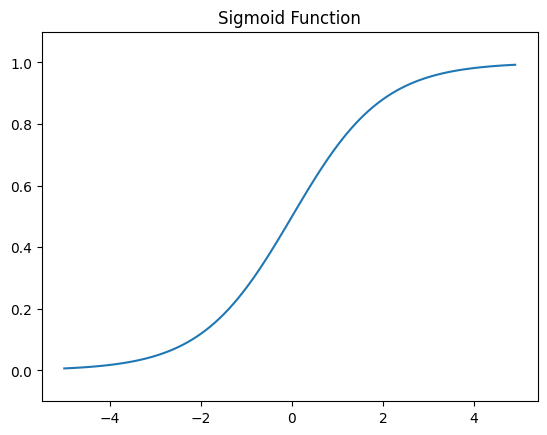

In [3]:
# -5~5中間每隔0.1，創建一個點
x = np.arange(-5.0, 5.0, 0.1)
Y_sigmoid = sigmoid(x)

plt.plot(x, Y_sigmoid)
plt.ylim(-0.1, 1.1)
plt.title('Sigmoid Function')
plt.show()

## Tangent
$$ -1\leq  tanh(z)\leq 1$$

公式：
$$z=tanh(z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}} \quad$$
    
優點就是與sigmoid的區別是，tanh 解決了sigmoid的輸出非「零為中心」的問題，因此實際應用中tanh會比sigmoid更好。<br>

缺點類似sigmoid，雖然收斂速度相對快了，但也存在梯度消失，而且也有冪計算，**比sigmoid相對耗時**。

In [4]:
def tangent(x):
    return (np.exp(x)-np.exp(-x)) / (np.exp(x) + np.exp(-x))

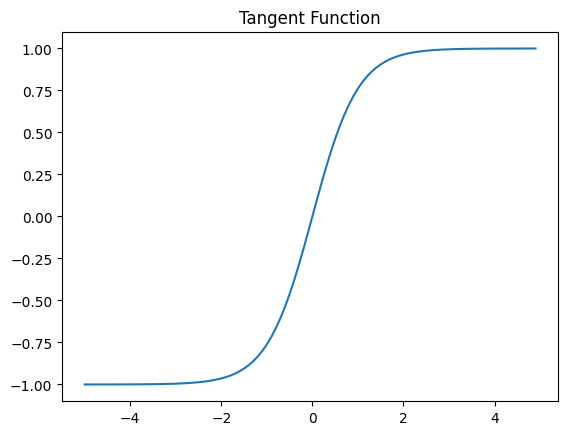

In [5]:
# -5~5中間每隔0.1，創建一個點
x = np.arange(-5.0, 5.0, 0.1)
Y_tangent = tangent(x)

plt.plot(x, Y_tangent)
plt.ylim(-1.1, 1.1)
plt.title('Tangent Function')
plt.show()

## Relu
$$relu=max(0,z)$$
優點：
* **SGD算法的收斂速度比 sigmoid 和 tanh 快**（梯度不會飽和，解決了梯度消失問題）
* 計算復雜度低，不需要進行指數運算
* 適合用於後向傳播

缺點：
* ReLU的輸出不是zero-centered
* Dead ReLU Problem（神經元壞死現象）: 某些神經元(特徵)可能永遠不會被激活，導致相應參數永遠不會被更新（在負數部分，梯度為0）
* 產生這種現象的兩個原因: 參數初始化問題；learning rate太高導致在訓練過程中參數更新太大。
* 避免將learning rate設置太大或使用自動調節learning rate的算法。

In [6]:
def relu(x):
    return np.maximum(0,x)
    '''
    for i in range(len(x)):
        if x[i] < 0:
            x[i]=0
    return x
    '''

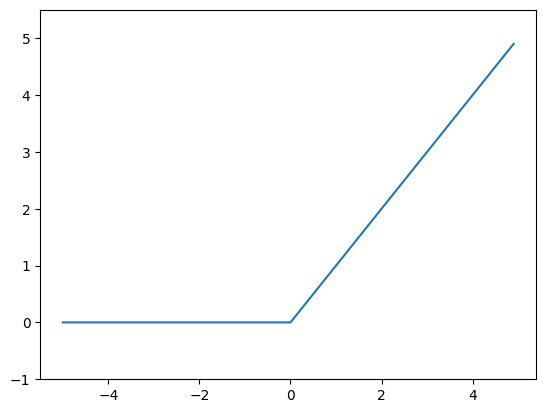

In [7]:
# -5~5中間每隔0.1，創建一個點
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

In [8]:
import numpy as np
import matplotlib.pylab as plt
import time

def sigmoid(z):
    """Sigmoid 函數，返回激活值"""
    return 1 / (1 + np.exp(-z))

def tangent(z):
    """Tangent 函數，返回激活值"""
    return np.tanh(z)

def relu(z):
    """ReLU 函數，返回激活值"""
    return np.maximum(0, z)

# 設定更大的範圍和更小的步長來生成更多的數據點
x = np.arange(-100.0, 100.0, 0.001)

# Sigmoid 函數
start = time.time()
Y_sigmoid = sigmoid(x)
time_sigmoid = time.time() - start

# Tangent 函數
start = time.time()
Y_tangent = tangent(x)
time_tangent = time.time() - start

# ReLU 函數
start = time.time()
Y_relu = relu(x)
time_relu = time.time() - start

# 比較三個激活函數的計算時間
print(f"Sigmoid Time: {time_sigmoid:.6f} sec")
print(f"Tangent Time: {time_tangent:.6f} sec")
print(f"ReLU Time: {time_relu:.6f} sec")

# 輸出最短計算時間的激活函數
times = {
    "Sigmoid": time_sigmoid,
    "Tangent": time_tangent,
    "ReLU": time_relu
}

fastest_function = min(times, key=times.get)
print(f"The fastest activation function is {fastest_function} with a time of {times[fastest_function]:.6f} sec")

Sigmoid Time: 0.003402 sec
Tangent Time: 0.010196 sec
ReLU Time: 0.000000 sec
The fastest activation function is ReLU with a time of 0.000000 sec
